In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
N = 100
x = np.random.uniform(0, 1, (N, 2))
sigma = np.mean(np.linalg.norm(x))

In [3]:
sigma

8.137569152779813

In [4]:
d = []
C_1 = []
C_min_1 = []
for i in range(N):
    if x[i][1] < (0.2 * np.sin(10*x[i][0])) + 0.3:
        d.append(1)
        C_1.append(x[i])
    elif (x[i][1] - 0.8)**2 + (x[i][0] - 0.5)**2 < 0.15**2:
        d.append(1)
        C_1.append(x[i])
    else:
        d.append(-1)
        C_min_1.append(x[i])

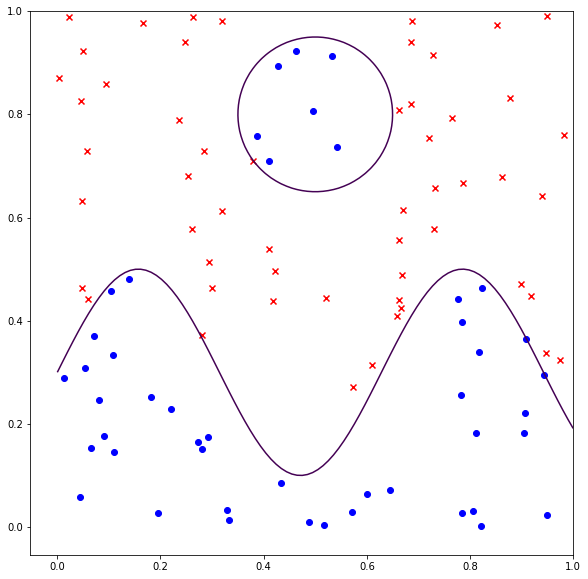

In [5]:
X = np.linspace(-0.0, 1.0, 100)
Y = np.linspace(-0.0, 1.0, 100)

X1, Y1 = np.meshgrid(X, Y)
F1 = (X1 - 0.5)**2 + (Y1 - 0.8)**2 - 0.15**2 
F2 = (-0.2 * np.sin(10* X1)) - 0.3 + Y1
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(*zip(*C_1), c='b', marker='o')
plt.scatter(*zip(*C_min_1), c='r', marker='x')
C1 = plt.contour(X,Y,F1,[0])
C2 = plt.contour(X,Y,F2,[0])
plt.gca().set_aspect('equal')
plt.show()

In [6]:
def k_means(centers, classPoints):
    k = len(centers)
    print("No of Points for the above Cluster is = {0}".format(len(classPoints)))
    clusters = np.zeros(len(classPoints))

    oldcenters = np.copy(centers)
    newCenters = np.zeros(shape=centers.shape)
    # Initial Error (Gets the total distance)
    e = dist(oldcenters, newCenters, None)
    #print(e)
    epoch = 0

    while e!=0:
        epoch +=1
        # Assigning each value to its closest cluster
        for i in range(len(classPoints)):
            distances = dist(classPoints[i], oldcenters)
            #print(distances)
            #Assign that point to a cluster near to it
            cluster = np.argmin(distances)
            clusters[i] = cluster
        #Find new centroids
        for i in range(k):
            # Get all points in the ith cluster and take their mean
            points = [classPoints[j] for j in range(len(classPoints)) if clusters[j] == i]
            newCenters[i] = np.mean(points,  axis = 0)
        e = dist(newCenters, oldcenters, None)
        #print(points)
        oldcenters = np.copy(newCenters)
        
    print("Epochs to converge: {0}".format(epoch))
    #print(type(newCenters))
    return newCenters, clusters
            

In [7]:
def dist(points, centroid, axis=1):
    return np.linalg.norm(points - centroid, axis=axis)


In [8]:
def plot_graph(Class_1, Class_2, Centers_1, Centers_2, Cluster_1, Cluster_2):
    fig, ax = plt.subplots(figsize=(10,10))
    #plt.scatter(*zip(*Class_1), c='red', label='Class +' )
    #plt.scatter(*zip(*Class_2), c='blue', label='Class -' )
    plt.scatter(*zip(*Centers_1), c='green', label='Centers +' , marker='*' )
    plt.scatter(*zip(*Centers_2), c='black', label='Centers -', marker='x' )

    pos_hues = ['#CD9B9B','#8B3A3A','#BF6666','#DBA9A9','#C67171','#802A2A','#CD5C5C','#CD5555','#A52A2A','#8B2323']
    neg_hues = ['#388E8E', '#79CDCD', '#D1EEEE', '#8FD8D8', '#66CCCC', '#ADEAEA', '#70DBDB', '#AEEEEE', '#008080', '#00EEEE']

    for i in range(len(Cluster_1)):
        plt.scatter(*zip(*Cluster_1[i]), color=pos_hues[i], label='Class +')
        plt.scatter(*zip(*Cluster_2[i]), color=neg_hues[i], label='Class -')
    plt.gca().set_aspect('equal')
    plt.show()

In [9]:
def sgn(x):
    if float(x) >=0.0: 
        return 1
    else: 
        return -1

In [10]:
def rbf(x_, center, c):
    return np.exp(-np.linalg.norm(x_ - center)**2 / (2*(c**2)) )


def multiplyWeights(w, Xi, b, mu):
    sum = 0
    for i in range(len(w)):
        product = w[i] * rbf(Xi, mu[i], sigma)
        sum += product
    #print(i, sgn(sum))
    finalSum = sum + b
    return finalSum

def rbf_matrix(x_, center_array , c):
    int_matrix = np.zeros(len(center_array))
    for i in range(len(center_array)):
        int_matrix[i] = rbf(x_, center_array[i], sigma)
    return int_matrix

    

In [11]:
def misclassifications(C1, C2, w, b, mu):
    misses = 0
    pos_mis = 0 
    neg_mis = 0
    m = len(mu)
    for i in range(len(C1)):
        y = np.dot(w.reshape(1,m),np.asarray(C1[i]).reshape(m,1)) + b
        if sgn(y)!=1:
            misses += 1
            pos_mis +=1
    for i in range(len(C2)):
        y = np.dot(w.reshape(1,m),np.asarray(C2[i]).reshape(m,1)) + b
        if sgn(y)!=-1:
            misses += 1
            neg_mis +=1
    #print("Pos mis ",pos_mis )
    #print("Neg Mis ",neg_mis)
    return misses

In [12]:
def pta(class_pos, class_neg, pos_centers, neg_centers):
    # initiaize weights 
    
    centers = np.concatenate([pos_centers, neg_centers])
    w = np.random.uniform(-1, 1, size=len(centers))
    new_x = []
    for i in range(len(x)):
        temp = []
        for j in range(len(centers)):
            temp.append(dist(x[i], centers[j], None))
        new_x.append(temp)
    
    sigma2 = np.mean(new_x)
    print(sigma2)
    
    #retain and work on copies as Numpy uses pass by reference
    C1 = np.copy(class_pos)
    C2 = np.copy(class_neg)

    new_C1 = []
    new_C2 = []
    for i in range(len(C1)):
        temp = []
        for j in range(len(centers)):
            temp.append(rbf(C1[i], centers[j], sigma))
        new_C1.append(temp)

    for i in range(len(C2)):
        temp = []
        for j in range(len(centers)):
            temp.append(rbf(C2[i], centers[j], sigma))
        new_C2.append(temp)


    dp = 1
    dn = -1
    bias = np.random.uniform(-1,1)
    m = len(centers)
    learning_rate = .000060
    epoch = 0
    miss = misclassifications(new_C1, new_C2, w, bias, centers)
    print("Miss ", miss)
    missarr = []
    missarr.append(miss)
    while miss > 20:
        epoch +=1
        #print("Epoch", epoch)
        for i in range(len(C1)):
            calc_y = np.dot(w.reshape(1,m),np.asarray(new_C1[i]).reshape(m,1)) + bias
            #print(calc_y, sgn(calc_y))
            #print(sgn(calc_y), calc_y)
            if sgn(calc_y) != dp:
                w[0:10] = w[0:10] + 2 * learning_rate * np.asarray(new_C1[i][0:10])
        for i in range(len(C2)):
            calc_y = np.dot(w.reshape(1,m),np.asarray(new_C2[i]).reshape(m,1)) + bias
            #print(sgn(calc_y), calc_y)
            if sgn(calc_y) != dn:
                w[10:20] = w[10:20] - 2 * learning_rate * np.asarray(new_C2[i][10:20])
        #print(w)
        miss = misclassifications(new_C1, new_C2, w, bias, centers)
        epoch +=1
        
        if miss > missarr[-1]:
            learning_rate *= 0.8
        missarr.append(miss)
    print("Miss ", miss)
    return (w, bias)
    



In [13]:
def Classify(centers, class_pos, class_neg):
    Class_1 = np.array(class_pos)
    Class_2 = np.array(class_neg)
    
    random_indices_1 = np.random.choice(range(len(Class_1)), centers//2, replace=False)
    random_indices_2 = np.random.choice(range(len(Class_2)), centers//2, replace=False)

    
    centers_1 = np.array([Class_1[i] for i in random_indices_1])
    centers_2 = np.array([Class_2[i] for i in random_indices_2])


    
    
    print("Positive Class")
    pos_centers, pos_clusters = k_means(centers_1, Class_1)
    pos_cluster_points = []
    neg_cluster_points = []
    for i in range(centers//2):
        points = [Class_1[j] for j in range(len(Class_1)) if pos_clusters[j] == i]
        pos_cluster_points.append(points)

    


    print("\nNegative Class")
    neg_centers, neg_clusters = k_means(centers_2, Class_2)
    for i in range(centers//2):
        points = [Class_2[j] for j in range(len(Class_2)) if neg_clusters[j] == i]
        neg_cluster_points.append(points)

    
    # Plotting 
    plot_graph(Class_1, Class_2, pos_centers, neg_centers, pos_cluster_points, neg_cluster_points)
    
    centpts = np.concatenate([pos_centers, neg_centers])

    w, b = pta(Class_1, Class_2, pos_centers, neg_centers)

    return (w, b, centpts)
    





Positive Class
No of Points for the above Cluster is = 46
Epochs to converge: 4

Negative Class
No of Points for the above Cluster is = 54
Epochs to converge: 7
0.5609544440634681
Miss  46
Miss  20


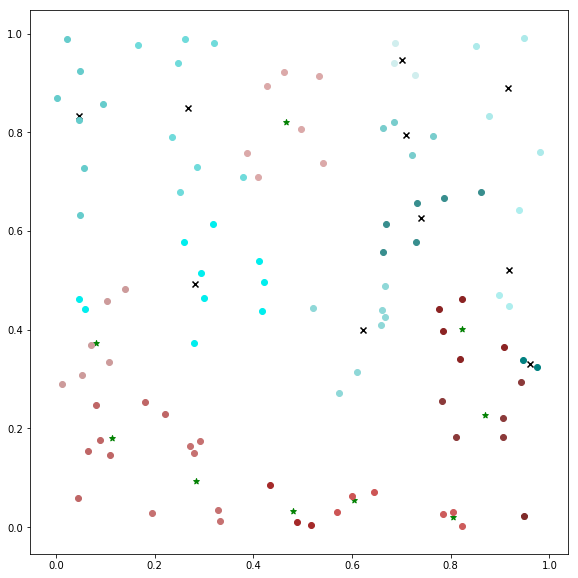

In [14]:
(w, b, centers) = Classify(20, C_1, C_min_1)
